In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:/PROJECT/02-DATA VISUALIZATION/Walmart/Walmart.csv")

In [3]:
df.head()

,transaction_id,customer_id,product_id,product_name,category,quantity_sold,unit_price,transaction_date,store_id,store_location,...,customer_loyalty_level,payment_method,promotion_applied,promotion_type,weather_conditions,holiday_indicator,weekday,stockout_indicator,forecasted_demand,actual_demand
0,1,2824,843,Fridge,Electronics,3,188.46,3/31/2024 21:46,3,"Miami, FL",...,Silver,Credit Card,True,NaN,Stormy,False,Friday,True,172,179
1,2,1409,135,TV,Electronics,4,1912.04,7/28/2024 12:45,5,"Dallas, TX",...,Gold,Cash,True,Percentage Discount,Rainy,False,Monday,True,109,484
2,3,5506,391,Fridge,Electronics,4,1377.75,6/10/2024 4:55,1,"Los Angeles, CA",...,Platinum,Cash,False,NaN,Sunny,False,Tuesday,True,289,416
3,4,5012,710,Smartphone,Electronics,5,182.31,8/15/2024 1:03,5,"Miami, FL",...,Silver,Cash,True,Percentage Discount,Sunny,True,Sunday,False,174,446
4,5,4657,116,Laptop,Electronics,3,499.28,9/13/2024 0:45,6,"Chicago, IL",...,Bronze,Digital Wallet,False,NaN,Sunny,False,Thursday,True,287,469


In [4]:
df.shape

(5000, 28)

In [5]:
df.columns

Index(['transaction_id', 'customer_id', 'product_id', 'product_name',
       'category', 'quantity_sold', 'unit_price', 'transaction_date',
       'store_id', 'store_location', 'inventory_level', 'reorder_point',
       'reorder_quantity', 'supplier_id', 'supplier_lead_time', 'customer_age',
       'customer_gender', 'customer_income', 'customer_loyalty_level',
       'payment_method', 'promotion_applied', 'promotion_type',
       'weather_conditions', 'holiday_indicator', 'weekday',
       'stockout_indicator', 'forecasted_demand', 'actual_demand'],
      dtype='object')

In [6]:
df = df[['customer_id', 'product_name', 'quantity_sold', 'unit_price', 'transaction_date', 'store_location',
       'customer_age', 'customer_gender', 'customer_income', 'payment_method']]

In [7]:
df.shape

(5000, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       5000 non-null   int64  
 1   product_name      5000 non-null   object 
 2   quantity_sold     5000 non-null   int64  
 3   unit_price        5000 non-null   float64
 4   transaction_date  5000 non-null   object 
 5   store_location    5000 non-null   object 
 6   customer_age      5000 non-null   int64  
 7   customer_gender   5000 non-null   object 
 8   customer_income   5000 non-null   float64
 9   payment_method    5000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 390.8+ KB


In [9]:
df.describe()

,customer_id,quantity_sold,unit_price,customer_age,customer_income
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,5542.497200,2.982800,1023.467294,44.124000,70041.627846
std,2582.126997,1.419474,559.614242,15.329358,29053.371736
min,1001.000000,1.000000,50.100000,18.000000,20005.340000
25%,3279.000000,2.000000,537.775000,31.000000,44865.417500
50%,5558.000000,3.000000,1029.175000,44.000000,70188.290000
75%,7767.250000,4.000000,1506.307500,58.000000,95395.872500
max,9998.000000,5.000000,1999.850000,70.000000,119999.780000


In [10]:
df.isnull().sum()

customer_id         0
product_name        0
quantity_sold       0
unit_price          0
transaction_date    0
store_location      0
customer_age        0
customer_gender     0
customer_income     0
payment_method      0
dtype: int64

In [11]:
df.columns

Index(['customer_id', 'product_name', 'quantity_sold', 'unit_price',
       'transaction_date', 'store_location', 'customer_age', 'customer_gender',
       'customer_income', 'payment_method'],
      dtype='object')

In [12]:
# calculate the amount

amount = df['quantity_sold'] * df['unit_price']
df['amount'] = amount

In [13]:
df.head()

,customer_id,product_name,quantity_sold,unit_price,transaction_date,store_location,customer_age,customer_gender,customer_income,payment_method,amount
0,2824,Fridge,3,188.46,3/31/2024 21:46,"Miami, FL",29,Other,98760.83,Credit Card,565.38
1,1409,TV,4,1912.04,7/28/2024 12:45,"Dallas, TX",34,Other,69781.93,Cash,7648.16
2,5506,Fridge,4,1377.75,6/10/2024 4:55,"Los Angeles, CA",69,Other,77373.10,Cash,5511.00
3,5012,Smartphone,5,182.31,8/15/2024 1:03,"Miami, FL",47,Other,33383.04,Cash,911.55
4,4657,Laptop,3,499.28,9/13/2024 0:45,"Chicago, IL",70,Female,108999.41,Digital Wallet,1497.84


In [14]:
# get state from store_location

df[['city','state']] = df['store_location'].str.split(',', expand = True)

In [15]:
df.head()

,customer_id,product_name,quantity_sold,unit_price,transaction_date,store_location,customer_age,customer_gender,customer_income,payment_method,amount,city,state
0,2824,Fridge,3,188.46,3/31/2024 21:46,"Miami, FL",29,Other,98760.83,Credit Card,565.38,Miami,FL
1,1409,TV,4,1912.04,7/28/2024 12:45,"Dallas, TX",34,Other,69781.93,Cash,7648.16,Dallas,TX
2,5506,Fridge,4,1377.75,6/10/2024 4:55,"Los Angeles, CA",69,Other,77373.10,Cash,5511.00,Los Angeles,CA
3,5012,Smartphone,5,182.31,8/15/2024 1:03,"Miami, FL",47,Other,33383.04,Cash,911.55,Miami,FL
4,4657,Laptop,3,499.28,9/13/2024 0:45,"Chicago, IL",70,Female,108999.41,Digital Wallet,1497.84,Chicago,IL


In [16]:
df[['month', 'day', 'year']] = df['transaction_date'].str.split('/', expand = True)

In [17]:
df.head()

,customer_id,product_name,quantity_sold,unit_price,transaction_date,store_location,customer_age,customer_gender,customer_income,payment_method,amount,city,state,month,day,year
0,2824,Fridge,3,188.46,3/31/2024 21:46,"Miami, FL",29,Other,98760.83,Credit Card,565.38,Miami,FL,3,31,2024 21:46
1,1409,TV,4,1912.04,7/28/2024 12:45,"Dallas, TX",34,Other,69781.93,Cash,7648.16,Dallas,TX,7,28,2024 12:45
2,5506,Fridge,4,1377.75,6/10/2024 4:55,"Los Angeles, CA",69,Other,77373.10,Cash,5511.00,Los Angeles,CA,6,10,2024 4:55
3,5012,Smartphone,5,182.31,8/15/2024 1:03,"Miami, FL",47,Other,33383.04,Cash,911.55,Miami,FL,8,15,2024 1:03
4,4657,Laptop,3,499.28,9/13/2024 0:45,"Chicago, IL",70,Female,108999.41,Digital Wallet,1497.84,Chicago,IL,9,13,2024 0:45


In [18]:
df = df[['customer_id', 'product_name', 'quantity_sold',
        'store_location', 'customer_age', 'customer_gender',
       'customer_income', 'payment_method', 'amount', 'state','month']]

In [19]:
df.columns

Index(['customer_id', 'product_name', 'quantity_sold', 'store_location',
       'customer_age', 'customer_gender', 'customer_income', 'payment_method',
       'amount', 'state', 'month'],
      dtype='object')

## EDA

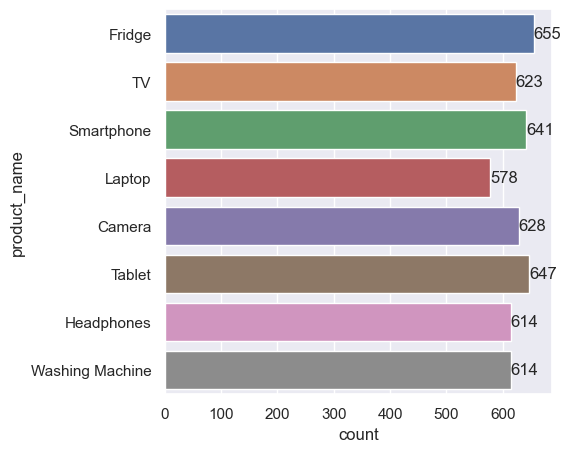

In [20]:
# 1. Which products were sold the most?

sns.set(rc={"figure.figsize":(5, 5)})
products = sns.countplot(data= df, y='product_name',hue= 'product_name')
for bars in products.containers:
    products.bar_label(bars)

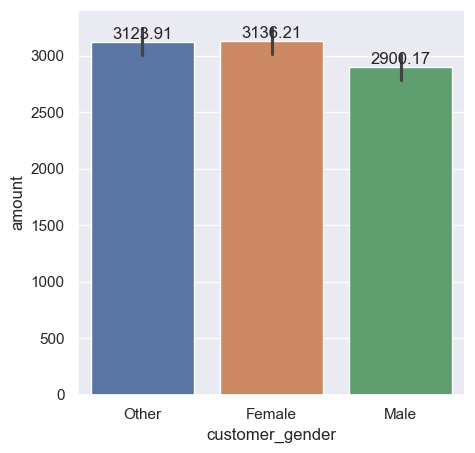

In [21]:
# 2. which gender spent the most?
sns.set(rc={"figure.figsize":(5, 5)})

cus_gender = sns.barplot(data = df, x='customer_gender', y='amount', hue = 'customer_gender')
for bars in cus_gender.containers:
    cus_gender.bar_label(bars)

In [22]:
# 3. what age-group spent the most money?

In [23]:
# Define bins and labels
bins = [0, 12, 19, 35, 50, 100]  # Define age ranges
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']  # Labels for age groups

In [24]:
# Create a new column with age groups
df['age_group'] = pd.cut(df['customer_age'], bins=bins, labels=labels, right=True)

In [25]:
df

,customer_id,product_name,quantity_sold,store_location,customer_age,customer_gender,customer_income,payment_method,amount,state,month,age_group
0,2824,Fridge,3,"Miami, FL",29,Other,98760.83,Credit Card,565.38,FL,3,Young Adult
1,1409,TV,4,"Dallas, TX",34,Other,69781.93,Cash,7648.16,TX,7,Young Adult
2,5506,Fridge,4,"Los Angeles, CA",69,Other,77373.10,Cash,5511.00,CA,6,Senior
3,5012,Smartphone,5,"Miami, FL",47,Other,33383.04,Cash,911.55,FL,8,Adult
4,4657,Laptop,3,"Chicago, IL",70,Female,108999.41,Digital Wallet,1497.84,IL,9,Senior
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,6898,Headphones,1,"New York, NY",67,Male,46960.75,Cash,682.15,NY,7,Senior
4996,8412,Laptop,3,"Los Angeles, CA",66,Male,65182.86,Digital Wallet,4254.27,CA,2,Senior
4997,8331,Fridge,5,"New York, NY",64,Female,90217.76,Digital Wallet,1993.30,NY,8,Senior
4998,7505,Laptop,3,"Miami, FL",30,Male,62265.15,Debit Card,3002.85,FL,8,Young Adult


([<matplotlib.patches.Wedge at 0x112eccd7cb0>,
 [Text(-0.9679419803735773, -0.522578532500597, 'Senior'),
  Text(0.9615599652333341, -0.534230692922514, 'Young Adult'),
  Text(0.2722941924366834, 1.0657653929290698, 'Adult'),
  Text(-0.751432950256865, 0.8033358707715373, 'Teen'),
  Text(-0.8426489205310407, 0.7070663312079513, 'Child')],
 [Text(-0.527968352931042, -0.28504283590941654, '38.0%'),
  Text(0.5244872537636367, -0.29139855977591667, '30.1%'),
  Text(0.14852410496546367, 0.5813265779613107, '28.1%'),
  Text(-0.4098725183219263, 0.4381832022390203, '3.8%'),
  Text(-0.45962668392602213, 0.3856725442952461, '0.0%')])

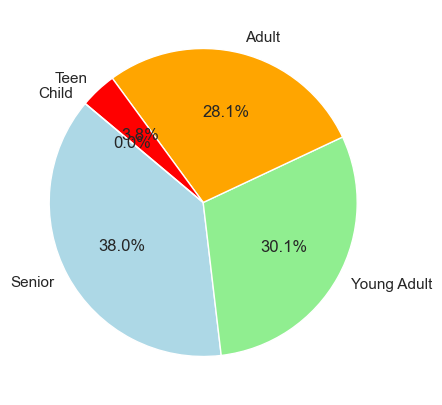

In [26]:
# Count occurrences of each group
age_group_counts = df['age_group'].value_counts()

plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', 
        colors=['lightblue', 'lightgreen', 'orange', 'red', 'purple'], startangle=140)

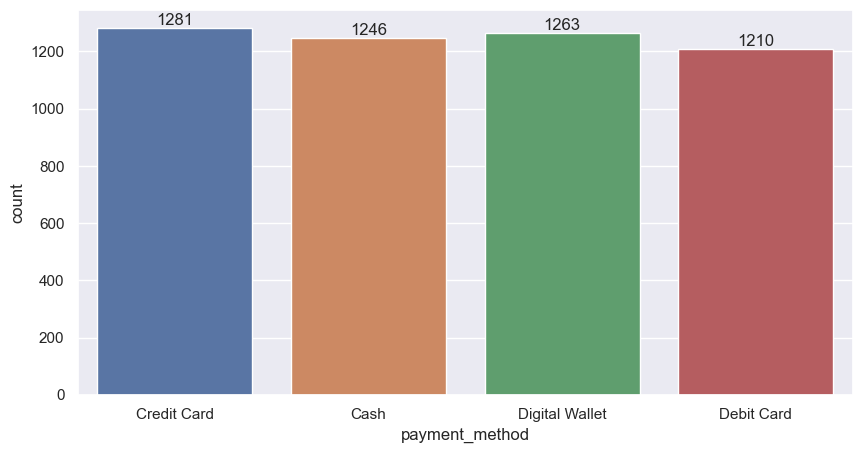

In [27]:
# 4. which mode of payment was prefered the most?

sns.set(rc={"figure.figsize":(10, 5)})
payment_method = sns.countplot(x = 'payment_method', data = df, hue='payment_method')

for bars in payment_method.containers:
    payment_method.bar_label(bars)

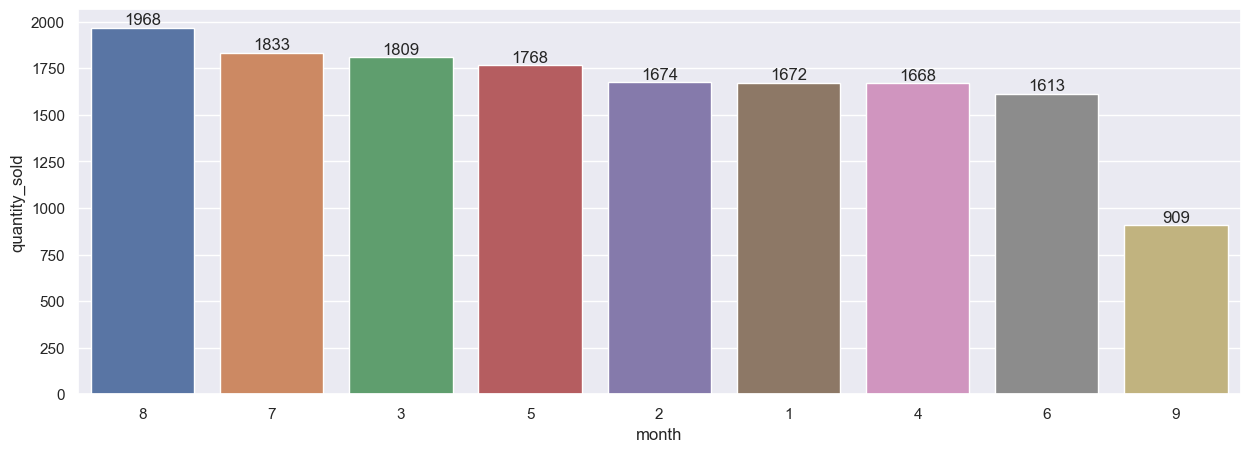

In [28]:
# 5. In which month the most sales happned?

orders = df.groupby(['month'], as_index = False)['quantity_sold'].sum().sort_values(by = ['quantity_sold'], ascending = False)
sns.set(rc={"figure.figsize":(15, 5)})
qt_sold = sns.barplot(x = 'month', y = 'quantity_sold', data = orders, hue ='month')
for bars in qt_sold.containers:
    qt_sold.bar_label(bars)

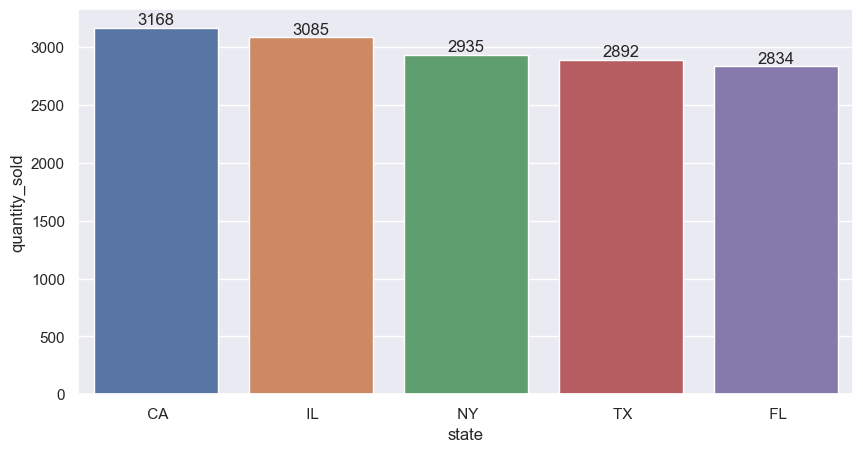

In [29]:
# 6. which location/state the sales were the most?

orders = df.groupby(['state'], as_index = False)['quantity_sold'].sum().sort_values(by = ['quantity_sold'], ascending = False)
sns.set(rc={"figure.figsize":(10, 5)})
qt_sold = sns.barplot(x = 'state', y = 'quantity_sold', data = orders, hue ='state')
for bars in qt_sold.containers:
    qt_sold.bar_label(bars)

## Analysis

Fridge were sold the most and Credit Card was prefered payment mothod. even though female spent the most but many customers prefered to be anonymous, most sales happned in california in the month of August and it is done by people age 35+.